<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/D18_Task_5_takehome_user_engagement_csv_and_takehome_users_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
# Import modules
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy import stats

In [252]:
# Uploading the takehome_user_engagement.csv and takehome_users.csv
uploaded = files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement (1).csv
Saving takehome_users.csv to takehome_users (1).csv


In [253]:
# Loading the dataset
takehome_user_engagement=pd.read_csv("/content/takehome_user_engagement.csv")
takehome_users=pd.read_csv("/content/takehome_users.csv",encoding="latin-1")

The description for all the columns in `takehome_users` is provided below.

|Columns|Description|
|-|-|
|`name`|the user's name|
|||
|`object_id`| the user's id|
|||
|`email`|email address|
|||
|`creation_source`|how their account was created|
|||
|`creation_time`| when they created their account|
|||
|`last_session_creation_time`|unix timestamp of last login|
|||
|`opted_in_to_mailing_list`|whether they have opted into receiving
marketing emails|
|||
|`enabled_for_marketing_drip`|whether they are on the regular
marketing email drip|
|||
|`org_id`|the organization (group of users) they belong to|
|||
|`invited_by_user_id`|which user invited them to join (if applicable)|



---


**creation_source** takes on one of 5 values mentioned below:
* `PERSONAL_PROJECTS` : invited to join another user's
personal workspace
* `GUEST_INVITE` : invited to an organization as a guest
(limited permissions)
* `ORG_INVITE` : invited to an organization (as a full member) 
* `SIGNUP` : signed up via the website
* `SIGNUP_GOOGLE_AUTH` : signed up using Google
Authentication (using a Gmail account for their login
id)


---



`takehome_user_engagement` --> that has a row for each day that a user logged into the product.

In [254]:
# First five rows in df_tue DataFrame (takehome_user_engagement.csv)
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,22-04-2014 03:53,1,1
1,15-11-2013 03:45,2,1
2,29-11-2013 03:45,2,1
3,09-12-2013 03:45,2,1
4,25-12-2013 03:45,2,1


In [255]:
# First five rows in df_tu DataFrame (takehome_users.csv)
takehome_users.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [256]:
# Number of Rows and Columns in df_tue DataFrame (takehome_user_engagement.csv)
takehome_user_engagement.shape

(207917, 3)

In [257]:
# Number of Rows and Columns in df_tu DataFrame (takehome_users.csv)
takehome_users.shape

(12000, 10)

In [258]:
# Information of the takehome_users DataFrame.
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [259]:
# Information of the takehome_user_engagement DataFrame.
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


**`Inference:`**There are no missing values in takehome_user_engagement dataframe. Whereas there are missing values in last_session_creation_time and invited_by_user_id of takehome_users dataframe. Also, the columns creation_time, last_session_creation_time and time_stamp will have to be converted into datetime objects.

In [260]:
# Finding the number of missing values in takehome_users DataFrame
takehome_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [261]:
#convert creation_time,last_session_time and time_stamp into DateTime objects.
takehome_users["creation_time"] = pd.to_datetime(takehome_users['creation_time'])
takehome_user_engagement["time_stamp"] = pd.to_datetime(takehome_user_engagement["time_stamp"])
# converting unix timestamp into datetime object
takehome_users["last_session_creation_time"] = pd.to_datetime(takehome_users['last_session_creation_time'], unit="s")

In [262]:
# Alternate approach
#takehome_users["last_session_creation_time"] = pd.Series(
#    [datetime.datetime.fromtimestamp(int(i)) for i in takehome_users["last_session_creation_time"]],
#                                                         index=takehome_users.index)

In [263]:
# Information of the takehome_users DataFrame.
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [264]:
# Information of the takehome_user_engagement DataFrame.
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


`The columns creation_time, last_session_creation_time and time_stamp have been converted into datetime objects.`

In [265]:
# The count of each value in "visited" column of takehome_user_engagement df.
takehome_user_engagement["visited"].value_counts()

1    207917
Name: visited, dtype: int64

`As all the values in the "visited" column is 1(same value), we will remove this column from our dataframe as it is not relevant for our analysis.`

In [266]:
# Dropping the 'visited' column from takehome_user_engagement dataframe
takehome_user_engagement.drop(['visited'],axis=1,inplace=True)
takehome_user_engagement.head(3)

,time_stamp,user_id
0,2014-04-22 03:53:00,1
1,2013-11-15 03:45:00,2
2,2013-11-29 03:45:00,2


In [267]:
# Checking data correctness by verifying last_session_creation_time is after creation_time
takehome_users[takehome_users["creation_time"] > takehome_users["last_session_creation_time"]]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
13,14,2012-11-10 16:14:00,Rivera Bret,BretKRivera@gmail.com,SIGNUP,2012-10-12 16:14:33,0,0,0,NaN
16,17,2014-09-04 14:39:00,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,2014-04-12 14:39:38,1,0,175,1600.0
19,20,2014-06-03 11:46:00,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,2014-05-29 11:46:38,0,0,58,NaN
21,22,2014-10-02 06:00:00,Myers Jordan,JordanMyers@gmail.com,ORG_INVITE,2014-02-10 06:00:46,0,0,7,2994.0
27,28,2013-11-02 20:00:00,Weissmuller Marko,MarkoWeissmuller@jourrapide.com,SIGNUP,2013-02-14 20:00:25,0,0,6,NaN
...,...,...,...,...,...,...,...,...,...,...
11966,11967,2014-12-01 08:12:00,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,2014-05-31 08:12:37,0,0,15,5688.0
11980,11981,2013-05-03 01:53:00,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,2013-04-02 01:53:48,0,0,110,5775.0
11983,11984,2014-11-02 21:26:00,Reed Cerys,CerysReed@yahoo.com,SIGNUP,2014-02-11 21:26:11,0,0,170,NaN
11991,11992,2014-09-04 19:39:00,Hermansen Amanda,AmandaAHermansen@yahoo.com,PERSONAL_PROJECTS,2014-04-11 19:39:56,0,0,129,NaN


**`Inference:`** 1371 rows have incorrect datetime values for "creation_time" and "last_session_creation_time" in takehome_users dataframe as "creation_time" should be less than "last_session_creation_time"(i.e., last login time). So, we will remove the rows which do not follow this.

In [268]:
# Removing rows with incorrect data
takehome_user = takehome_users[~(takehome_users["creation_time"] > takehome_users["last_session_creation_time"])]
print("Number of Rows at Present:",takehome_user.shape[0])

Number of Rows at Present: 10629


In [269]:
# invited_by_user_id column will be NaN if the user has signed up directly, without any invitation.
takehome_user[takehome_user["invited_by_user_id"].isnull()]["creation_source"].value_counts()

PERSONAL_PROJECTS     1991
SIGNUP                1785
SIGNUP_GOOGLE_AUTH    1186
Name: creation_source, dtype: int64

```If "invited_by_user_id" is not an NaN value(that is, for all non-missing values), "creation_source" column will not have PERSONAL_PROJECTS, SIGNUP, SIGNUP_GOOGLE_AUTH as it's values.```

In [270]:
print(takehome_user[(takehome_user["creation_source"]=='PERSONAL_PROJECTS') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

print(takehome_user[(takehome_user["creation_source"]=='SIGNUP') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

print(takehome_user[(takehome_user["creation_source"]=='SIGNUP_GOOGLE_AUTH') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

0
0
0


The output of all the above 3 is an empty dataframe which agrees with our above conclusion.

In [271]:
# Filling the missing values in invited_by_user_id by 0
takehome_users.invited_by_user_id.fillna(0,inplace=True)

In [272]:
# Number of missing values in invited_by_user_id column
takehome_users["invited_by_user_id"].isnull().sum()

0

In [273]:
# Renaming the "object_id" column with new column name "user_id" in takehome_users dataframe.
takehome_users.rename(columns={"object_id":"user_id"}, inplace = True)
takehome_users.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [274]:
# Dropping unnecessary columns which are not needed for the analysis.
takehome_users.drop(['name', 'email'], axis=1, inplace=True)
takehome_users.columns

Index(['user_id', 'creation_time', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [275]:
# First 3 rows
takehome_users.head(3)

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0


In [276]:
# Getting the user-ids with missing values in last_session_creation_time
userid_lastsession_nan = takehome_users[takehome_users["last_session_creation_time"].isnull()]["user_id"]

In [277]:
# Checking the login dates for userids in takehome_user_engagement dataframe
# with missing last_session_creation_time in takehome_users dataframe
takehome_user_engagement[takehome_user_engagement["user_id"].isin(userid_lastsession_nan)]

,time_stamp,user_id


**`Inference:`** There are no login details available in takehome_user_engagement dataframe for the users who have missing last_session_creation_time. So we will fill all missing entries in last_session_creation_time column with dates specified in  creation_time column of takehome_users dataframe, assuming that is the only time they logged into the product.

In [278]:
# Treating the missing values in 'last_session_creation_time' column
takehome_users["last_session_creation_time"].fillna(takehome_users["creation_time"],inplace=True)

In [279]:
takehome_users.isnull().sum()

user_id                       0
creation_time                 0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [280]:
left_df = takehome_users[['user_id','org_id','invited_by_user_id']]
right_df = takehome_users[['user_id','org_id']]
left_df.head(3)

,user_id,org_id,invited_by_user_id
0,1,11,10803.0
1,2,1,316.0
2,3,94,1525.0


In [281]:
right_df.head(3)

,user_id,org_id
0,1,11
1,2,1
2,3,94


In [282]:
df = pd.merge(left_df, right_df, how = 'left', left_on = 'invited_by_user_id', right_on = 'user_id')
df.head()

,user_id_x,org_id_x,invited_by_user_id,user_id_y,org_id_y
0,1,11,10803.0,10803.0,11.0
1,2,1,316.0,316.0,1.0
2,3,94,1525.0,1525.0,94.0
3,4,1,5151.0,5151.0,1.0
4,5,193,5240.0,5240.0,193.0


In [283]:
df[(df.org_id_x!=df.org_id_y) & (df.invited_by_user_id!=0)]

,user_id_x,org_id_x,invited_by_user_id,user_id_y,org_id_y


`Above empty dataframe indicates that the users and their reference belong to the same group.`

An "adopted user" is a user who has logged into the product on three separate days in at least one seven-day period. We will add a column for adopted user with boolean values - True for adopted user, False otherwise.

In [284]:
# org_size = Number of users in each organization
# Adding org_size column
temp = takehome_users.org_id.value_counts()
takehome_users['org_size'] = [temp[i] for i in takehome_users['org_id']]

In [285]:
# referred = if the user was invited to sign in then True else False
# Adding referred
takehome_users['referred'] = takehome_users['invited_by_user_id'] != 0
takehome_users.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:00,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:00,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True


In [286]:
# User-defined function called get_count()
def get_count(grp, w):
    return grp.rolling(w, on='time_stamp')['user_id'].count()

In [287]:
#time_stamp must be monotonic for applying rolling()
takehome_user_engagement.sort_values(by=["time_stamp"], inplace=True) 

# adding a column '7_day_visit' into takehome_user_engagement dataframe.
takehome_user_engagement['7_day_visit']=takehome_user_engagement.groupby('user_id', 
                                 as_index=False, 
                                 group_keys=False).apply(get_count, '7D')

takehome_user_engagement.head()

,time_stamp,user_id,7_day_visit
109716,2012-01-06 00:17:00,6102,1.0
200931,2012-01-06 01:42:00,11430,1.0
32373,2012-01-06 13:14:00,1995,1.0
179759,2012-01-06 14:30:00,10163,1.0
140780,2012-01-06 20:02:00,8068,1.0


In [288]:
# Creating a data frame with adopted_user status against the user_id
df_ad = takehome_user_engagement.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_ad['adopted_user'] = df_ad['7_day_visit']>=3
df_ad.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,2.0,False
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [289]:
# Merging 2 dataframes
df = pd.merge( takehome_users,df_ad,how='outer',on='user_id').drop(['7_day_visit'],axis=1)
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,False
2,3,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:00,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:00,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False


In [290]:
# Getting the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  12000 non-null  datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  float64       
 8   org_size                    12000 non-null  int64         
 9   referred                    12000 non-null  bool          
 10  adopted_user                8823 non-null   object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), o

`We can see some missing values in 'adopted_user' column. It has NaN values only for the cases where user did not login. For such cases, we will fill NaN with False.`

In [291]:
# Replacing missing values in adopted_user column with False
df.adopted_user.fillna(False,inplace=True)
# checking for missing values in adopted_user column. 
df.adopted_user.isnull().sum()

0

In [292]:
# Adding one more column for checking if the reference user is adopted
df = pd.merge(df,df[['user_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='user_id')
df.head()

,user_id_x,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user_x,user_id_y,adopted_user_y
0,1,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,10803.0,False
1,2,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,False,316.0,False
2,3,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,1525.0,True
3,4,2013-05-21 08:09:00,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,5151.0,True
4,5,2013-01-17 10:14:00,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,5240.0,True


In [293]:
df.drop(columns='user_id_y',inplace=True)
df.rename(columns={'user_id_x':'user_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_ref'},inplace=True)
df.adopted_ref.fillna(False,inplace=True)
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_ref
0,1,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,False,False
2,3,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:00,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:00,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,True


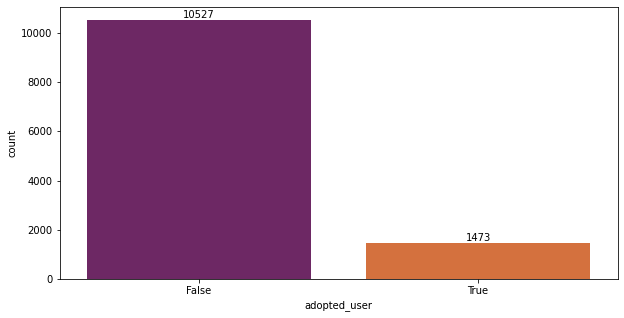

In [294]:
# count plot w.r.t target column('adopted_user' column)
plt.figure(figsize=(10,5))
cp = sns.countplot(x='adopted_user', data=df, palette="inferno")
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')
plt.show()

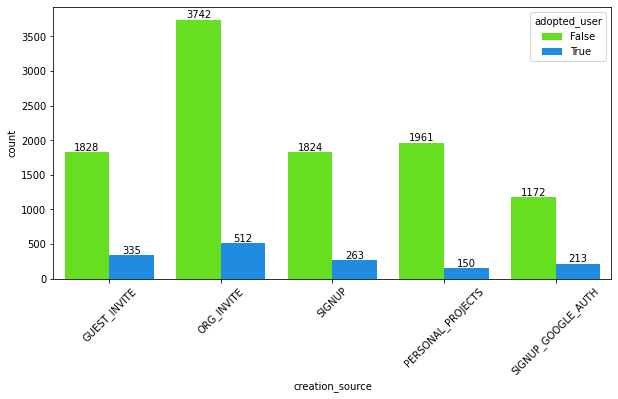

In [295]:
# count plot w.r.t 'creation_source' column
plt.figure(figsize=(10,5))
cp = sns.countplot(x="creation_source",hue='adopted_user', data=df, palette="gist_rainbow")
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [296]:
def login(df_1):
    x = df_1.creation_time.to_frame()
    x.index = x.creation_time
    return x.resample("M").count()

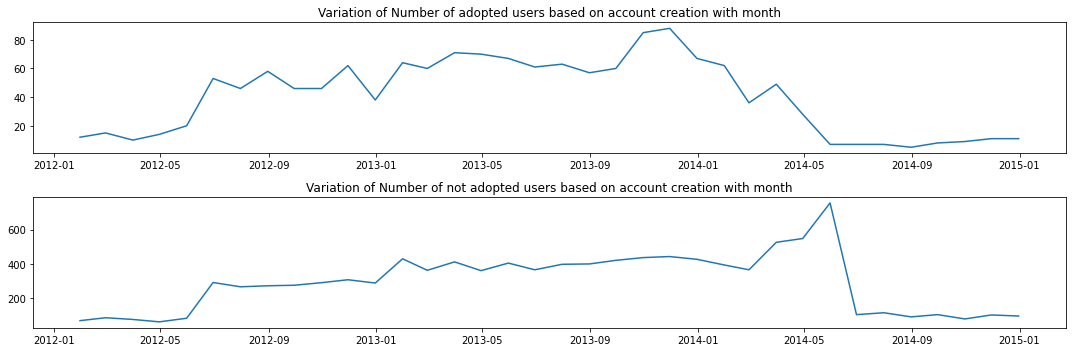

In [297]:
adopted_mc = login(df[df.adopted_user==True])
nt_adopted_mc = login(df[df.adopted_user==False])

fig = plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(adopted_mc)
plt.title('Variation of Number of adopted users based on account creation with month')

plt.subplot(2,1,2)
plt.plot(nt_adopted_mc)
plt.title('Variation of Number of not adopted users based on account creation with month')

plt.tight_layout()


`For new users, the adoption rate seems to be going down, the reason of which is that they are not old enough to fulfil the criteria for adoption.`

In [298]:
df.drop(['user_id','creation_time','last_session_creation_time'],axis=1,inplace=True)
df.columns

Index(['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'org_size', 'referred', 'adopted_user', 'adopted_ref'],
      dtype='object')

In [299]:
#converts categorical data,"creation_source" into dummy or indicator variables.
df_new = pd.get_dummies(df)
df_new.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_ref,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,75,True,False,False,1,0,0,0,0
1,0,0,1,316.0,233,True,False,False,0,1,0,0,0
2,0,0,94,1525.0,32,True,False,True,0,1,0,0,0
3,0,0,1,5151.0,233,True,False,True,1,0,0,0,0
4,0,0,193,5240.0,16,True,False,True,1,0,0,0,0


In [300]:
# Getting the information of the dataframe.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   org_size                            12000 non-null  int64  
 5   referred                            12000 non-null  bool   
 6   adopted_user                        12000 non-null  bool   
 7   adopted_ref                         12000 non-null  bool   
 8   creation_source_GUEST_INVITE        12000 non-null  uint8  
 9   creation_source_ORG_INVITE          12000 non-null  uint8  
 10  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 11  creation_source_SIGNUP              12000

In [301]:
# Extracting Feature and Target Variables.
X = df_new.loc[:,df_new.columns != "adopted_user"] #feature variables
y = df_new['adopted_user'] #Target  variable

In [302]:
# Shape of Feature and Target variable
print(X.shape)
print(y.shape)

(12000, 12)
(12000,)


`As we have to find the features that predict user adoption, and not predict user adoption, we will not split our dataset in training and testing sets.`

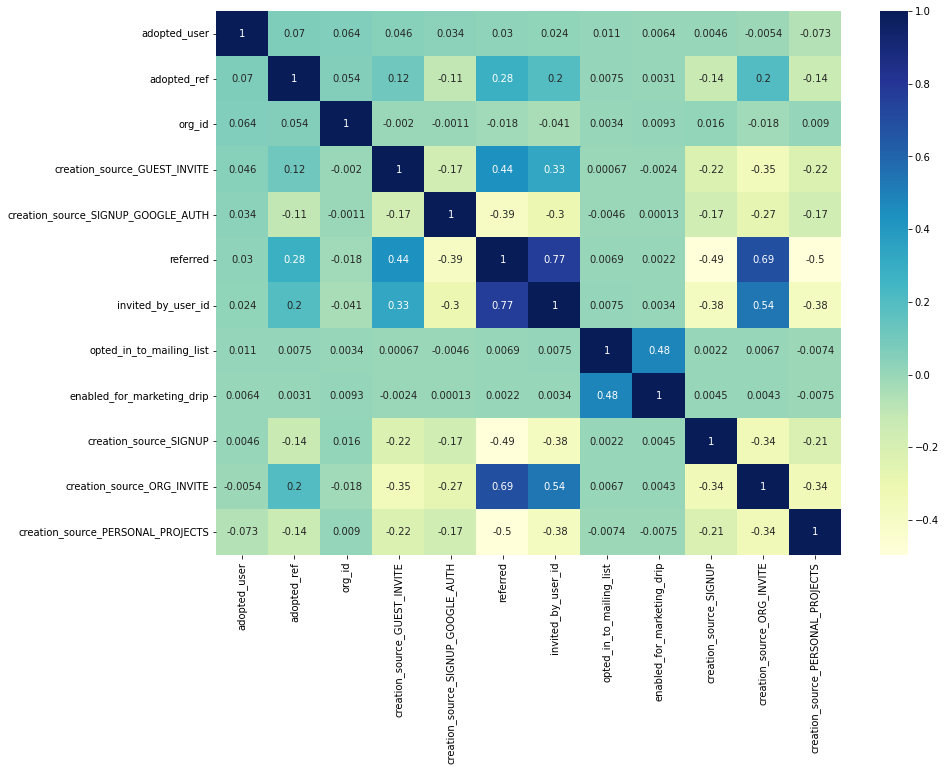

In [303]:
# Heatmap 
k=12 # number of features
cols = df_new.corr().nlargest(k,'adopted_user')['adopted_user'].index
corr_df = df_new[cols].corr()
plt.figure(figsize=(14,10))
#plot heat map
sns.heatmap(corr_df,annot=True,cmap="YlGnBu")
plt.show()

In [304]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Applying SelectKBest class to score the 12 features
feature_select = SelectKBest(score_func=chi2, k=12).fit(X,y)
feature_select_df = pd.DataFrame({"Feature":list(X.columns),
                                  "Scores":feature_select.scores_})

print(feature_select_df.nlargest(12,'Scores'))

                               Feature        Scores
3                   invited_by_user_id  31172.377596
4                             org_size   5613.108276
2                               org_id   5385.944095
6                          adopted_ref     53.815478
9    creation_source_PERSONAL_PROJECTS     52.386260
7         creation_source_GUEST_INVITE     20.733141
11  creation_source_SIGNUP_GOOGLE_AUTH     12.392687
5                             referred      5.091275
0             opted_in_to_mailing_list      1.177799
1           enabled_for_marketing_drip      0.422751
8           creation_source_ORG_INVITE      0.226165
10              creation_source_SIGNUP      0.207013


[0.01853163 0.01729865 0.3920829  0.28674971 0.25863322 0.00092372
 0.01020807 0.00315916 0.00253057 0.0061303  0.00135665 0.00239542]


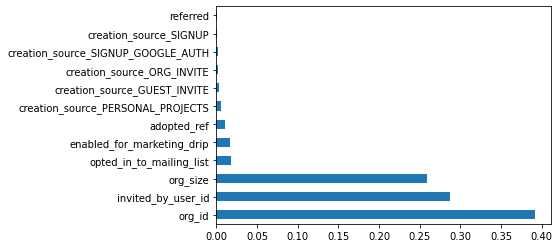

In [305]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# Plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [306]:
#calculating p-value matrix for multiple variables with the target

df1= pd.DataFrame(columns=["r","p"])

for col in df_new:
  if pd.api.types.is_numeric_dtype(df_new[col]):
    r,p = stats.pearsonr(df_new['adopted_user'],df_new[col])
    df1.loc[col] = [round(r,3), round(p,6)]
df1

,r,p
opted_in_to_mailing_list,0.011,0.210334
enabled_for_marketing_drip,0.006,0.480878
org_id,0.064,0.000000
invited_by_user_id,0.024,0.009965
org_size,-0.079,0.000000
referred,0.030,0.000938
adopted_user,1.000,0.000000
adopted_ref,0.070,0.000000
creation_source_GUEST_INVITE,0.046,0.000000
creation_source_ORG_INVITE,-0.005,0.553941


# **`Final Inference`**

From the above heatmap, bar graph and the p-values, the important features seem to be org_id, org_size, invited_by_user_id, referred, adopted_reference, creation_source_PERSONAL_PROJECTS.

`Results`

The most important features seem to be `org_id`, `org_size`, `invited_by_user_id`.
